<a href="https://www.kaggle.com/code/emidaolamide/investigate-a-dataset-tmdb-movie-data-udacity?scriptVersionId=116213284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Investigate a Dataset (TMDb movie data)
Author: **Olamide Emida**    
Data source: Click [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. The following questions will be answered with the data:



### Questions
1. What is the average user rating for all the movies?
2. What is the average number of movies per year?
3. What is the average revenue per year?
4. What kinds of properties are associated with movies that have high revenues?
5. Which genres are most popular from year to year?


In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



## General Properties

In [2]:
#load the data and view the first five rows

df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#view the shape of the data

df.shape

(10866, 21)

In [4]:
#view the general information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We have 10866 rows and 21 columns.

The following cleaning will be performed: remove extraneous columns, remove null values and remove duplicate rows.

## Data Cleaning

**Delete extraneous columns**

In [5]:
#delete extraneous columns

df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace = True)
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [6]:
#check for zero values in budget and revenue

columns = ['budget', 'revenue']

(df[columns] == 0).any()

budget     True
revenue    True
dtype: bool

There are rows with zero budget and revenue figures

In [7]:
#replace the zeros with NAN and drop rows that contain them

df[columns] = df[columns].replace(0, np.NAN)

df.dropna(subset = columns, inplace = True)

In [8]:
#confirm the removal of the zero values

columns = ['budget', 'revenue']

(df[columns] == 0).any()

budget     False
revenue    False
dtype: bool

**Remove Null values**

In [9]:
#view for other null values for each column

df.isnull().sum().any()

False

There are no more null values in the data.

**Remove duplicate rows**

In [10]:
#check for duplicate rows

df.duplicated().sum()

1

We have just one duplicated row.

In [11]:
#delete the duplicated row

df.drop_duplicates(inplace = True)

In [12]:
#confirm the removal of duplicated row

df.duplicated().sum()

0

In [13]:
#properties of the cleaned data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   float64
 3   revenue         3854 non-null   float64
 4   original_title  3854 non-null   object 
 5   runtime         3854 non-null   int64  
 6   genres          3854 non-null   object 
 7   release_date    3854 non-null   object 
 8   vote_count      3854 non-null   int64  
 9   vote_average    3854 non-null   float64
 10  release_year    3854 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 361.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### What is the average user rating for all the movies?



**Statistical summary of numeric features**

In [14]:
#statistics summary for numeric features

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


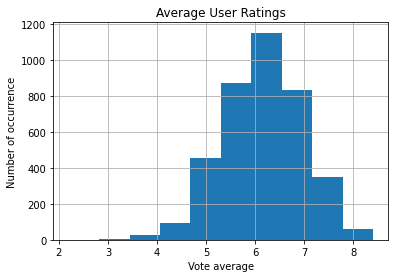

In [15]:
#distribution of user ratings to see the average ratings

df['vote_average'].hist()
plt.title('Average User Ratings')
plt.xlabel('Vote average')
plt.ylabel('Number of occurrence');

The vote average for the movies is 6.17. This indicates the average users' ratings for all the movies.

### What is the average number of movies per year?

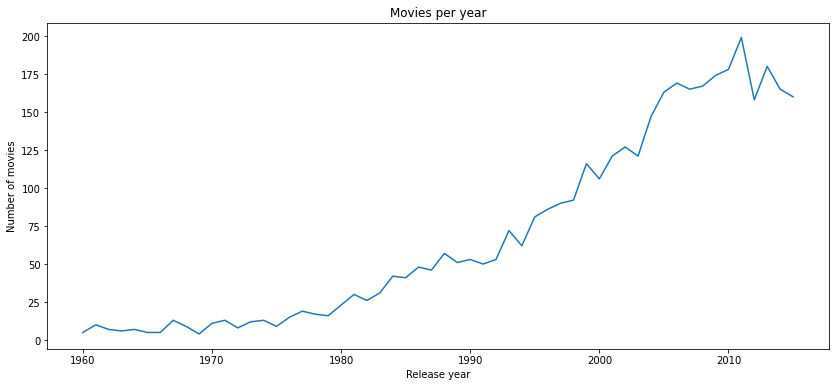

In [16]:
#Number of movies per year

df['release_year'].value_counts().sort_index().plot(figsize=(14,6), kind='line')
plt.title('Movies per year')
plt.xlabel('Release year')
plt.ylabel('Number of movies');

The number of movies produced have been increasing over time. The highest number of movies were produced in 2011.

### What is the average revenue per year?

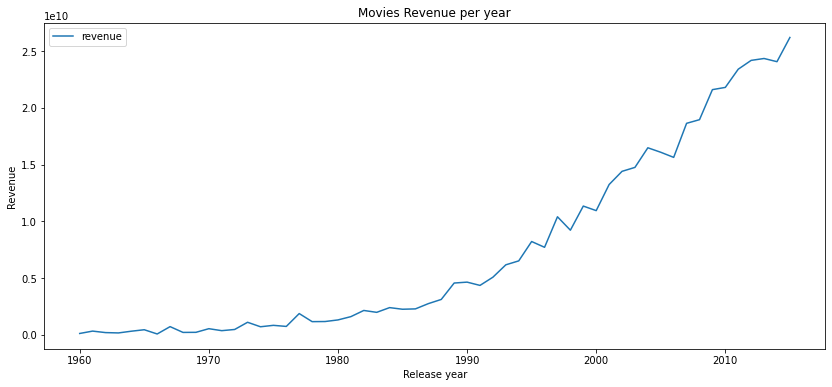

In [17]:
#revenue per year

df.groupby('release_year').sum()[['revenue']].plot(figsize=(14,6), kind='line')
plt.title('Movies Revenue per year')
plt.xlabel('Release year')
plt.ylabel('Revenue');

The revenues generated from the movies have been increasing over time. The highest revenue was generated in 2015.

### What kinds of properties are associated with movies that have high revenues?


Plot of three scatter diagrams to see the relationship between revenue and three properties in the data: popularity, runtime and vote average

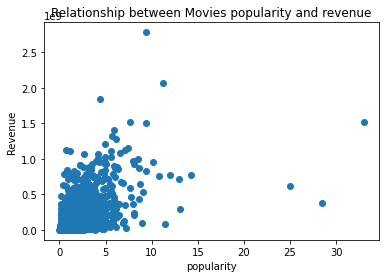

In [18]:
#create a funtion to plot the relationship between revenue and other variables

def to_chart(var):
    plt.scatter(x=df[var], y=df['revenue'])
    plt.title('Relationship between Movies {} and revenue'.format(var))
    plt.xlabel(var)
    plt.ylabel('Revenue');

#Movies popularity Vs Revenue scatterplot
to_chart('popularity')

Movies' Popularity seems to be more positively correlated with revenue compared to other properties of the data. Movies with more popularity seems to generate higher revenue. More research needs to be done on the most important properties associated with high revenue.

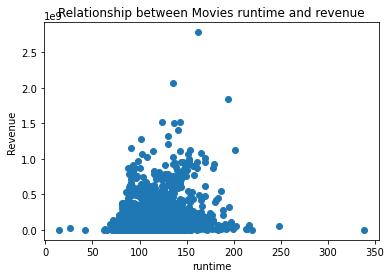

In [19]:
#Movies runtime Vs Revenue scatterplot

to_chart('runtime')

There is weak correlation between runtime and revenue

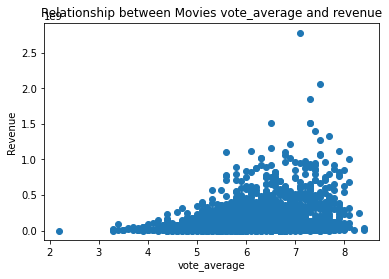

In [20]:
#Vote average Vs Revenue scatterplot

to_chart('vote_average')

There is weak correlation between vote average and revenue

### Which genres are most popular from year to year? 

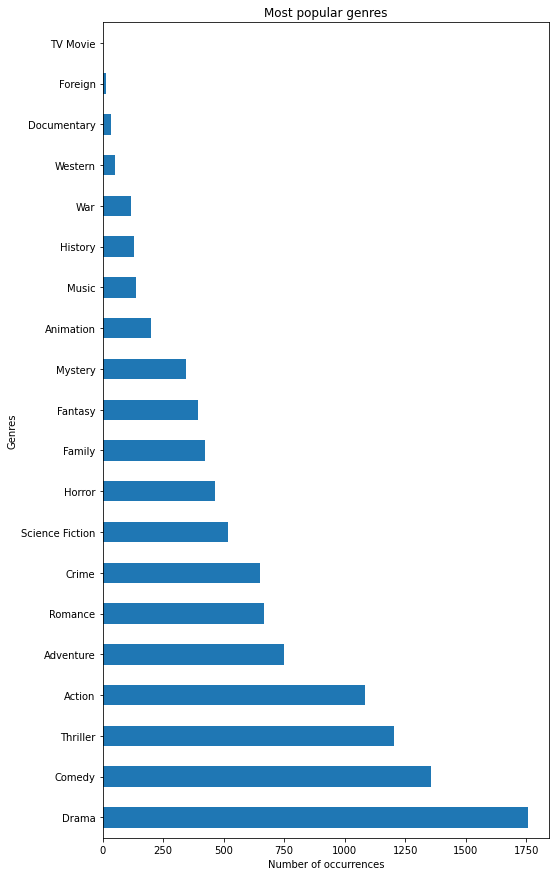

In [21]:
#Most popular genres

genres_div = df['genres'].str.split("|")

genres_combined = []

for gen in genres_div:
    genres_combined.extend(gen)
    
pd.Series(genres_combined).value_counts().plot(figsize=(8,15), kind="barh")
plt.title('Most popular genres')
plt.xlabel('Number of occurrences')
plt.ylabel('Genres');

The top five genres are Drama, Comedy, Thriller, action and Adventure.

<a id='conclusions'></a>
## Conclusions
This data set contains information about 10,866 movies. Data cleaning like removing extraneous columns, deleting null values and deleting duplicates were performed in order to enable accurate analysis. Exploratory data analysis was also carried out to arrive at the following findings:


**Findings**
1. The vote average for the movies is 6.16. This indicates the average users' ratings for all the movies.
2. The number of movies produced and the revenue generated have been increasing over time. The highest number of movies were produced in 2011 while the highest revenue was generated in 2015.
3. Movies' Popularity seems to be more positively correlated with revenue. Movies with more popularity seems to generate higher revenue. More research needs to be done on the most important properties associated with high revenue.
4. The top five genres are Drama, Comedy, Thriller, action and adventure.



### Limitations
Nonetheless, these findings must be interpreted with caution and a number of limitations should be borne in mind:
1. The findings were made based on descriptive statistics.
2. Additional research need to be peformed to understand why some movies generated zero revenue because the removal of the rows with zero revenue reduced the data shape.